### Import libraries

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf
import cv2
from PIL import Image

In [21]:
import os
y_labels = os.listdir('train/')

#### Creating X_train

In [22]:
filenames = []
for label in y_labels:
    if label[-3:] == 'xml':
        continue
    else:
        filenames.append("train/" + label)

#### Creating y_train label

In [23]:
edited_y_label = []

for label in y_labels:
    if label[-3:] == 'xml':
        continue
    arr = label.split('_')
    edited_y_label.append(arr[0])

In [24]:
len(filenames), len(edited_y_label)

(240, 240)

#### Create dataframe for easier visualization of data sets

In [25]:
df = pd.DataFrame(columns=['filenames'], data=filenames)

In [26]:
df['y_train'] = edited_y_label

In [27]:
df

,filenames,y_train
0,train/apple_1.jpg,apple
1,train/apple_10.jpg,apple
2,train/apple_11.jpg,apple
3,train/apple_12.jpg,apple
4,train/apple_13.jpg,apple
...,...,...
235,train/orange_74.jpg,orange
236,train/orange_75.jpg,orange
237,train/orange_76.jpg,orange
238,train/orange_8.jpg,orange


In [28]:
img = cv2.imread(filenames[0], cv2.IMREAD_COLOR)
img.shape

(349, 349, 3)

### Deciding size of image to set by plotting histogram

In [29]:
# Getting the dimensions of all the image into a list
dim1 = []
dim2 = []
colors = []

for img_filename in filenames:
    x, y, c = plt.imread(img_filename).shape
    dim1.append(x)
    dim2.append(y)
    colors.append(c)

In [30]:
dim1 = np.array(dim1)
dim2 = np.array(dim2)
colors = np.array(colors)

In [31]:
dim1.max(), dim2.max(), colors.mean()

(4605, 3160, 3.1083333333333334)

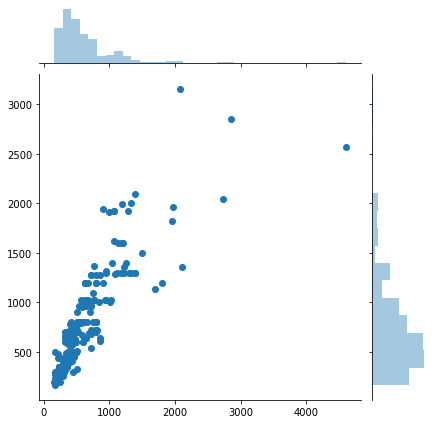

In [34]:
sns.jointplot(x=dim1, y=dim2);

In [ ]:
dim1.mean(), dim2.mean()

In [ ]:
# Taking the mean of the image size, we set the image size to be 650 by 650 by 3 for easier computation
image_size = (650, 650)

### Resize the images to proper and similar size and create x_train

In [35]:
x_train = None

for i in range(len(edited_y_label)):
    img_raw = cv2.imread(filenames[i], cv2.IMREAD_COLOR)
    img_reshaped = cv2.resize(img_raw,(650, 650), cv2.INTER_NEAREST)
    img_reshaped = cv2.cvtColor(img_reshaped, cv2.COLOR_BGR2RGB)
    if x_train is None:
        x_train = img_reshaped
    else:
        x_train = np.concatenate((x_train, img_reshaped))



In [36]:
x_train = x_train.reshape(-1, 650, 650, 3)

In [37]:
x_train.shape

(240, 650, 650, 3)

### Determine the max value of each cell and min before normalizing

In [38]:
x_train.max(), x_train.min()

(255, 0)

### Normalize the data set

In [39]:
x_train = x_train/255

#### Verify data is shaped correctly

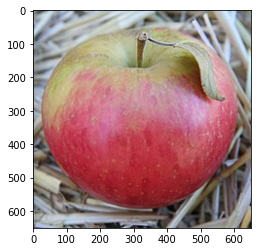

In [40]:
img = x_train[69]
plt.imshow(img)

### One-Hot encoding data using keras to_categorical

In [45]:
# Check the number of unique labels
labels = np.unique(edited_y_label)

In [46]:
n_labels = len(labels)

In [47]:
n_labels

4

In [49]:
y_train_1hot = tf.keras.utils.to_categorical(edited_y_label, n_labels)

ValueError: invalid literal for int() with base 10: 'apple'

### Train model

#### Add layers to train

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(64, 64, 3)))
model.add(tf.keras.layers.Conv2D(filters=32,
    kernel_size=(5, 5),
    activation='relu',
    input_shape=(64, 64, 3)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))

#### Compile using categorical_crossEntropy

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

#### Fit the data

In [ ]:
hist = 

#### Plot the accuracy and loss values

In [ ]:
# Retrain if accuracy is not good enough

### Input test data for estimation